In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import QuantileTransformer, PowerTransformer

from pprint import pprint
%matplotlib inline
%load_ext autoreload
%timeit
%autoreload 2

pd.set_option('display.max_columns', 500)

In [2]:
def load_reviews_and_animes():
    path = "data/reviews_and_animes/"
    train_XY = pd.read_hdf(path + "train_reviews_and_animes.hdf5", "table")
    test_XY = pd.read_hdf(path + "test_reviews_and_animes.hdf5", "table")
    return train_XY, test_XY

In [3]:
train_XY, test_XY = load_reviews_and_animes()

In [4]:
train_XY.head()

,mal_id,title,review_id,reviewer,content,date,helpful_count,reviewer.episodes_seen,docvec_0,docvec_1,docvec_2,docvec_3,docvec_4,docvec_5,docvec_6,docvec_7,docvec_8,docvec_9,docvec_10,docvec_11,docvec_12,docvec_13,docvec_14,docvec_15,docvec_16,docvec_17,docvec_18,docvec_19,docvec_20,docvec_21,docvec_22,docvec_23,docvec_24,docvec_25,docvec_26,docvec_27,docvec_28,docvec_29,docvec_30,docvec_31,docvec_32,docvec_33,docvec_34,docvec_35,docvec_36,docvec_37,docvec_38,docvec_39,docvec_40,docvec_41,docvec_42,docvec_43,docvec_44,docvec_45,docvec_46,docvec_47,docvec_48,docvec_49,docvec_50,docvec_51,docvec_52,docvec_53,docvec_54,docvec_55,docvec_56,docvec_57,docvec_58,docvec_59,docvec_60,docvec_61,docvec_62,docvec_63,docvec_64,docvec_65,docvec_66,docvec_67,docvec_68,docvec_69,docvec_70,docvec_71,docvec_72,docvec_73,docvec_74,docvec_75,docvec_76,docvec_77,docvec_78,docvec_79,docvec_80,docvec_81,docvec_82,docvec_83,docvec_84,docvec_85,docvec_86,docvec_87,docvec_88,docvec_89,docvec_90,docvec_91,docvec_92,docvec_93,docvec_94,docvec_95,docvec_96,docvec_97,docvec_98,docvec_99,animation_Negative,animation_Neutral,animation_Positive,character_Negative,character_Neutral,character_Positive,enjoyment_Negative,enjoyment_Neutral,enjoyment_Positive,sound_Negative,sound_Neutral,sound_Positive,story_Negative,story_Neutral,story_Positive,overall_Negative,overall_Neutral,overall_Positive,title_english,dropped,favorites,plan_to_watch,watching,season_Fall,season_Spring,season_Summer,season_Winter,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,is_Very_Popular,is_Popular,is_Unpopular,is_Very_Unpopular,has_Prequel,has_Sequel,is_Light novel,is_Manga,is_Original,is_Visual novel,is_Action,is_Adventure,is_Comedy,is_Drama,is_Ecchi,is_Fantasy,is_Harem,is_Josei,is_Mystery,is_Romance,is_School,is_Sci-Fi,is_Seinen,is_Shoujo,is_Shounen,is_Slice of Life,is_Supernatural,sv_0,sv_1,sv_2,sv_3,sv_4,sv_5,sv_6,sv_7,sv_8,sv_9,sv_10,sv_11,sv_12,sv_13,sv_14,sv_15,sv_16,sv_17,sv_18,sv_19,sv_20,sv_21,sv_22,sv_23,sv_24,sv_25,sv_26,sv_27,sv_28,sv_29,sv_30,sv_31,sv_32,sv_33,sv_34,sv_35,sv_36,sv_37,sv_38,sv_39,sv_40,sv_41,sv_42,sv_43,sv_44,sv_45,sv_46,sv_47,sv_48,sv_49,sv_50,sv_51,sv_52,sv_53,sv_54,sv_55,sv_56,sv_57,sv_58,sv_59,sv_60,sv_61,sv_62,sv_63,sv_64,sv_65,sv_66,sv_67,sv_68,sv_69,sv_70,sv_71,sv_72,sv_73,sv_74,sv_75,sv_76,sv_77,sv_78,sv_79,sv_80,sv_81,sv_82,sv_83,sv_84,sv_85,sv_86,sv_87,sv_88,sv_89,sv_90,sv_91,sv_92,sv_93,sv_94,sv_95,sv_96,sv_97,sv_98,sv_99,sv_100,sv_101,sv_102,sv_103,sv_104,sv_105,sv_106,sv_107,sv_108,sv_109,sv_110,sv_111,sv_112,sv_113,sv_114,sv_115,sv_116,sv_117,sv_118,sv_119,sv_120,sv_121,sv_122,sv_123,sv_124,sv_125,sv_126,sv_127,sv_128,sv_129,sv_130,sv_131,sv_132,sv_133,sv_134,sv_135,sv_136,sv_137,sv_138,sv_139,sv_140,sv_141,sv_142,sv_143,sv_144,sv_145,sv_146,sv_147,sv_148,sv_149,sv_150,sv_151,sv_152,sv_153,sv_154,sv_155,sv_156,sv_157,sv_158,sv_159,sv_160,sv_161,sv_162,sv_163,sv_164,sv_165,sv_166,sv_167,sv_168,sv_169,sv_170,sv_171,sv_172,sv_173,sv_174,sv_175,sv_176,sv_177,sv_178,sv_179,sv_180,sv_181,sv_182,sv_183,sv_184,sv_185,sv_186,sv_187,sv_188,sv_189,sv_190,sv_191,sv_192,sv_193,sv_194,sv_195,sv_196,sv_197,sv_198,sv_199,sv_200,sv_201,sv_202,sv_203,sv_204,sv_205,sv_206,sv_207,sv_208,sv_209,sv_210,sv_211,sv_212,sv_213,sv_214,sv_215,sv_216,sv_217,sv_218,sv_219,sv_220,sv_221,sv_222,sv_223,sv_224,sv_225,sv_226,sv_227,sv_228,sv_229,sv_230,sv_231,sv_232,sv_233,sv_234,sv_235,sv_236,sv_237,sv_238,sv_239,sv_240,sv_241,sv_242,sv_243,sv_244,sv_245,sv_246,sv_247,sv_248,sv_249,sv_250,sv_251,sv_252,sv_253,sv_254,sv_255,sv_256,sv_257,sv_258,sv_259,sv_260,sv_261,sv_262,sv_263,sv_264,sv_265,sv_266,sv_267,sv_268,sv_269,sv_270,sv_271,sv_272,sv_273,sv_274,sv_275,sv_276,sv_277,sv_278,sv_279,sv_280,sv_281,sv_282,sv_283,sv_284,sv_285,sv_286,sv_287,sv_288,sv_289,sv_290,sv_291,sv_292,sv_293,sv_294,sv_295,sv_296,sv_297,sv_298,sv_299,is_Poor,is_Below_Average,is_Average,is_Above_Average,is_Excelle

In [5]:
ids = ["mal_id", "title", "review_id"]
misc = ["content", "date", "title_english", "reviewer", "reviewer.episodes_seen"]
review_scores = [
    'animation_Negative', 'animation_Neutral', 'animation_Positive',
    'character_Negative', 'character_Neutral', 'character_Positive',
    'enjoyment_Negative', 'enjoyment_Neutral', 'enjoyment_Positive',
    'sound_Negative', 'sound_Neutral', 'sound_Positive',
    'story_Negative', 'story_Neutral', 'story_Positive',
    'overall_Negative', 'overall_Neutral', 'overall_Positive'
]
anime_scores = [
    'is_Poor',
    'is_Below_Average',
    'is_Average',
    'is_Above_Average',
    'is_Excellent'
]
label_names = misc + review_scores + anime_scores

In [6]:
train_X = train_XY.drop(label_names, axis=1)
train_Y = train_XY[ids + label_names].drop(misc, axis=1)
test_X = test_XY.drop(label_names, axis=1)
test_Y = test_XY[ids + label_names].drop(misc, axis=1)

In [7]:
train_X.head()

,mal_id,title,review_id,helpful_count,docvec_0,docvec_1,docvec_2,docvec_3,docvec_4,docvec_5,docvec_6,docvec_7,docvec_8,docvec_9,docvec_10,docvec_11,docvec_12,docvec_13,docvec_14,docvec_15,docvec_16,docvec_17,docvec_18,docvec_19,docvec_20,docvec_21,docvec_22,docvec_23,docvec_24,docvec_25,docvec_26,docvec_27,docvec_28,docvec_29,docvec_30,docvec_31,docvec_32,docvec_33,docvec_34,docvec_35,docvec_36,docvec_37,docvec_38,docvec_39,docvec_40,docvec_41,docvec_42,docvec_43,docvec_44,docvec_45,docvec_46,docvec_47,docvec_48,docvec_49,docvec_50,docvec_51,docvec_52,docvec_53,docvec_54,docvec_55,docvec_56,docvec_57,docvec_58,docvec_59,docvec_60,docvec_61,docvec_62,docvec_63,docvec_64,docvec_65,docvec_66,docvec_67,docvec_68,docvec_69,docvec_70,docvec_71,docvec_72,docvec_73,docvec_74,docvec_75,docvec_76,docvec_77,docvec_78,docvec_79,docvec_80,docvec_81,docvec_82,docvec_83,docvec_84,docvec_85,docvec_86,docvec_87,docvec_88,docvec_89,docvec_90,docvec_91,docvec_92,docvec_93,docvec_94,docvec_95,docvec_96,docvec_97,docvec_98,docvec_99,dropped,favorites,plan_to_watch,watching,season_Fall,season_Spring,season_Summer,season_Winter,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,is_Very_Popular,is_Popular,is_Unpopular,is_Very_Unpopular,has_Prequel,has_Sequel,is_Light novel,is_Manga,is_Original,is_Visual novel,is_Action,is_Adventure,is_Comedy,is_Drama,is_Ecchi,is_Fantasy,is_Harem,is_Josei,is_Mystery,is_Romance,is_School,is_Sci-Fi,is_Seinen,is_Shoujo,is_Shounen,is_Slice of Life,is_Supernatural,sv_0,sv_1,sv_2,sv_3,sv_4,sv_5,sv_6,sv_7,sv_8,sv_9,sv_10,sv_11,sv_12,sv_13,sv_14,sv_15,sv_16,sv_17,sv_18,sv_19,sv_20,sv_21,sv_22,sv_23,sv_24,sv_25,sv_26,sv_27,sv_28,sv_29,sv_30,sv_31,sv_32,sv_33,sv_34,sv_35,sv_36,sv_37,sv_38,sv_39,sv_40,sv_41,sv_42,sv_43,sv_44,sv_45,sv_46,sv_47,sv_48,sv_49,sv_50,sv_51,sv_52,sv_53,sv_54,sv_55,sv_56,sv_57,sv_58,sv_59,sv_60,sv_61,sv_62,sv_63,sv_64,sv_65,sv_66,sv_67,sv_68,sv_69,sv_70,sv_71,sv_72,sv_73,sv_74,sv_75,sv_76,sv_77,sv_78,sv_79,sv_80,sv_81,sv_82,sv_83,sv_84,sv_85,sv_86,sv_87,sv_88,sv_89,sv_90,sv_91,sv_92,sv_93,sv_94,sv_95,sv_96,sv_97,sv_98,sv_99,sv_100,sv_101,sv_102,sv_103,sv_104,sv_105,sv_106,sv_107,sv_108,sv_109,sv_110,sv_111,sv_112,sv_113,sv_114,sv_115,sv_116,sv_117,sv_118,sv_119,sv_120,sv_121,sv_122,sv_123,sv_124,sv_125,sv_126,sv_127,sv_128,sv_129,sv_130,sv_131,sv_132,sv_133,sv_134,sv_135,sv_136,sv_137,sv_138,sv_139,sv_140,sv_141,sv_142,sv_143,sv_144,sv_145,sv_146,sv_147,sv_148,sv_149,sv_150,sv_151,sv_152,sv_153,sv_154,sv_155,sv_156,sv_157,sv_158,sv_159,sv_160,sv_161,sv_162,sv_163,sv_164,sv_165,sv_166,sv_167,sv_168,sv_169,sv_170,sv_171,sv_172,sv_173,sv_174,sv_175,sv_176,sv_177,sv_178,sv_179,sv_180,sv_181,sv_182,sv_183,sv_184,sv_185,sv_186,sv_187,sv_188,sv_189,sv_190,sv_191,sv_192,sv_193,sv_194,sv_195,sv_196,sv_197,sv_198,sv_199,sv_200,sv_201,sv_202,sv_203,sv_204,sv_205,sv_206,sv_207,sv_208,sv_209,sv_210,sv_211,sv_212,sv_213,sv_214,sv_215,sv_216,sv_217,sv_218,sv_219,sv_220,sv_221,sv_222,sv_223,sv_224,sv_225,sv_226,sv_227,sv_228,sv_229,sv_230,sv_231,sv_232,sv_233,sv_234,sv_235,sv_236,sv_237,sv_238,sv_239,sv_240,sv_241,sv_242,sv_243,sv_244,sv_245,sv_246,sv_247,sv_248,sv_249,sv_250,sv_251,sv_252,sv_253,sv_254,sv_255,sv_256,sv_257,sv_258,sv_259,sv_260,sv_261,sv_262,sv_263,sv_264,sv_265,sv_266,sv_267,sv_268,sv_269,sv_270,sv_271,sv_272,sv_273,sv_274,sv_275,sv_276,sv_277,sv_278,sv_279,sv_280,sv_281,sv_282,sv_283,sv_284,sv_285,sv_286,sv_287,sv_288,sv_289,sv_290,sv_291,sv_292,sv_293,sv_294,sv_295,sv_296,sv_297,sv_298,sv_299
0,8426,Hourou Musuko,232931,1,1.080740,-1.689326,0.280989,1.213978,1.251429,-1.503841,-1.464203,0.013494,0.854812,-0.001600,-0.981685,-0.077378,-0.221890,-0.610173,0.852703,-0.716176,0.394199,0.199221,-0.771814,-0.067870,1.109169,-0.893586,1.581535,0.178041,0.480514,-0.014135,1.114745,0.925915,-0.309333,1.472071,-0.111341,-0.010307,-0.567599,-0.046492,-2.028070,-0.994556,0.765735,-0.097645,-0.158931,-1.210363,0.522571,-0.518

In [8]:
train_Y.head()

,mal_id,title,review_id,animation_Negative,animation_Neutral,animation_Positive,character_Negative,character_Neutral,character_Positive,enjoyment_Negative,enjoyment_Neutral,enjoyment_Positive,sound_Negative,sound_Neutral,sound_Positive,story_Negative,story_Neutral,story_Positive,overall_Negative,overall_Neutral,overall_Positive,is_Poor,is_Below_Average,is_Average,is_Above_Average,is_Excellent
0,8426,Hourou Musuko,232931,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,8426,Hourou Musuko,35521,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0
2,8426,Hourou Musuko,210447,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,0
3,8426,Hourou Musuko,217165,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0
4,8426,Hourou Musuko,218042,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1,0,0


## TODO:
* Perform sentiment analysis to test dataset
* Manifold learning for more EDA
* Implement a training pipeline with hyperparameter search in sklearn to evaluate other scores
* Extract sentiment from text (see [this](https://github.com/explosion/spacy/blob/master/examples/deep_learning_keras.py) and [this](https://textblob.readthedocs.io/en/dev/quickstart.html#sentiment-analysis))

## Future:
* Do recommendation IMBD and wikidata
* Look into Kaggle dataset and do recommendation based on user preferences
* Integrate both reviews and preferences for anime recommendation by using extracted sentiments
* Random forest to determine important attributes/words (exclude the word/doc vectors)

## The Far Future:
* Set up a database
* Implement data collection pipeline
* Implement data preprocessing pipeline for reviews + animes

#### Normalize `helpful_count`
I really need to get organized...

I picked PowerTransform since it looks more nicely spread out.

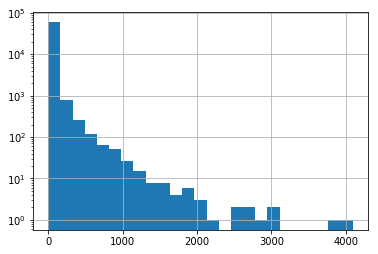

In [9]:
train_X["helpful_count"].hist(log=True, bins=25)

In [10]:
qt = QuantileTransformer(n_quantiles=3000,
                         output_distribution="normal",
                         subsample=1e6,
                         random_state=1)
x = qt.fit_transform(train_X["helpful_count"].values.reshape(-1,1))

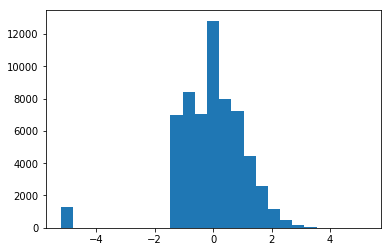

In [11]:
plt.hist(x, bins=25)
plt.show()

In [12]:
pt = PowerTransformer(standardize=False)
x = pt.fit_transform(train_X["helpful_count"].values.reshape(-1,1))

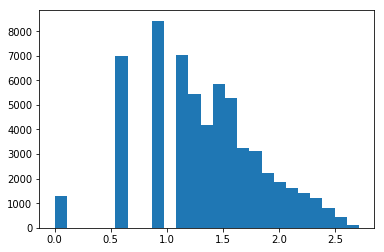

In [13]:
plt.hist(x, bins=25)
plt.show()

In [14]:
train_X["helpful_count"] = x

In [15]:
test_X["helpful_count"] = pt.transform(test_X["helpful_count"].values.reshape(-1,1))

In [16]:
train_X.head()

,mal_id,title,review_id,helpful_count,docvec_0,docvec_1,docvec_2,docvec_3,docvec_4,docvec_5,docvec_6,docvec_7,docvec_8,docvec_9,docvec_10,docvec_11,docvec_12,docvec_13,docvec_14,docvec_15,docvec_16,docvec_17,docvec_18,docvec_19,docvec_20,docvec_21,docvec_22,docvec_23,docvec_24,docvec_25,docvec_26,docvec_27,docvec_28,docvec_29,docvec_30,docvec_31,docvec_32,docvec_33,docvec_34,docvec_35,docvec_36,docvec_37,docvec_38,docvec_39,docvec_40,docvec_41,docvec_42,docvec_43,docvec_44,docvec_45,docvec_46,docvec_47,docvec_48,docvec_49,docvec_50,docvec_51,docvec_52,docvec_53,docvec_54,docvec_55,docvec_56,docvec_57,docvec_58,docvec_59,docvec_60,docvec_61,docvec_62,docvec_63,docvec_64,docvec_65,docvec_66,docvec_67,docvec_68,docvec_69,docvec_70,docvec_71,docvec_72,docvec_73,docvec_74,docvec_75,docvec_76,docvec_77,docvec_78,docvec_79,docvec_80,docvec_81,docvec_82,docvec_83,docvec_84,docvec_85,docvec_86,docvec_87,docvec_88,docvec_89,docvec_90,docvec_91,docvec_92,docvec_93,docvec_94,docvec_95,docvec_96,docvec_97,docvec_98,docvec_99,dropped,favorites,plan_to_watch,watching,season_Fall,season_Spring,season_Summer,season_Winter,year_2005,year_2006,year_2007,year_2008,year_2009,year_2010,year_2011,year_2012,year_2013,year_2014,year_2015,year_2016,year_2017,year_2018,is_Very_Popular,is_Popular,is_Unpopular,is_Very_Unpopular,has_Prequel,has_Sequel,is_Light novel,is_Manga,is_Original,is_Visual novel,is_Action,is_Adventure,is_Comedy,is_Drama,is_Ecchi,is_Fantasy,is_Harem,is_Josei,is_Mystery,is_Romance,is_School,is_Sci-Fi,is_Seinen,is_Shoujo,is_Shounen,is_Slice of Life,is_Supernatural,sv_0,sv_1,sv_2,sv_3,sv_4,sv_5,sv_6,sv_7,sv_8,sv_9,sv_10,sv_11,sv_12,sv_13,sv_14,sv_15,sv_16,sv_17,sv_18,sv_19,sv_20,sv_21,sv_22,sv_23,sv_24,sv_25,sv_26,sv_27,sv_28,sv_29,sv_30,sv_31,sv_32,sv_33,sv_34,sv_35,sv_36,sv_37,sv_38,sv_39,sv_40,sv_41,sv_42,sv_43,sv_44,sv_45,sv_46,sv_47,sv_48,sv_49,sv_50,sv_51,sv_52,sv_53,sv_54,sv_55,sv_56,sv_57,sv_58,sv_59,sv_60,sv_61,sv_62,sv_63,sv_64,sv_65,sv_66,sv_67,sv_68,sv_69,sv_70,sv_71,sv_72,sv_73,sv_74,sv_75,sv_76,sv_77,sv_78,sv_79,sv_80,sv_81,sv_82,sv_83,sv_84,sv_85,sv_86,sv_87,sv_88,sv_89,sv_90,sv_91,sv_92,sv_93,sv_94,sv_95,sv_96,sv_97,sv_98,sv_99,sv_100,sv_101,sv_102,sv_103,sv_104,sv_105,sv_106,sv_107,sv_108,sv_109,sv_110,sv_111,sv_112,sv_113,sv_114,sv_115,sv_116,sv_117,sv_118,sv_119,sv_120,sv_121,sv_122,sv_123,sv_124,sv_125,sv_126,sv_127,sv_128,sv_129,sv_130,sv_131,sv_132,sv_133,sv_134,sv_135,sv_136,sv_137,sv_138,sv_139,sv_140,sv_141,sv_142,sv_143,sv_144,sv_145,sv_146,sv_147,sv_148,sv_149,sv_150,sv_151,sv_152,sv_153,sv_154,sv_155,sv_156,sv_157,sv_158,sv_159,sv_160,sv_161,sv_162,sv_163,sv_164,sv_165,sv_166,sv_167,sv_168,sv_169,sv_170,sv_171,sv_172,sv_173,sv_174,sv_175,sv_176,sv_177,sv_178,sv_179,sv_180,sv_181,sv_182,sv_183,sv_184,sv_185,sv_186,sv_187,sv_188,sv_189,sv_190,sv_191,sv_192,sv_193,sv_194,sv_195,sv_196,sv_197,sv_198,sv_199,sv_200,sv_201,sv_202,sv_203,sv_204,sv_205,sv_206,sv_207,sv_208,sv_209,sv_210,sv_211,sv_212,sv_213,sv_214,sv_215,sv_216,sv_217,sv_218,sv_219,sv_220,sv_221,sv_222,sv_223,sv_224,sv_225,sv_226,sv_227,sv_228,sv_229,sv_230,sv_231,sv_232,sv_233,sv_234,sv_235,sv_236,sv_237,sv_238,sv_239,sv_240,sv_241,sv_242,sv_243,sv_244,sv_245,sv_246,sv_247,sv_248,sv_249,sv_250,sv_251,sv_252,sv_253,sv_254,sv_255,sv_256,sv_257,sv_258,sv_259,sv_260,sv_261,sv_262,sv_263,sv_264,sv_265,sv_266,sv_267,sv_268,sv_269,sv_270,sv_271,sv_272,sv_273,sv_274,sv_275,sv_276,sv_277,sv_278,sv_279,sv_280,sv_281,sv_282,sv_283,sv_284,sv_285,sv_286,sv_287,sv_288,sv_289,sv_290,sv_291,sv_292,sv_293,sv_294,sv_295,sv_296,sv_297,sv_298,sv_299
0,8426,Hourou Musuko,232931,0.615764,1.080740,-1.689326,0.280989,1.213978,1.251429,-1.503841,-1.464203,0.013494,0.854812,-0.001600,-0.981685,-0.077378,-0.221890,-0.610173,0.852703,-0.716176,0.394199,0.199221,-0.771814,-0.067870,1.109169,-0.893586,1.581535,0.178041,0.480514,-0.014135,1.114745,0.925915,-0.309333,1.472071,-0.111341,-0.010307,-0.567599,-0.046492,-2.028070,-0.994556,0.765735,-0.097645,-0.158931,-1.210363,0.522571

In [17]:
def invert_one_hot(X, labels, label_name):
    new_col = X[labels].idxmax(axis=1)
    new_X = X.assign(**{label_name:new_col})
    new_X.drop(labels=labels, axis="columns", inplace=True)
    return new_X

train_anime_scores = invert_one_hot(train_Y, anime_scores, "Anime_Score")
test_anime_scores = invert_one_hot(test_Y, anime_scores, "Anime_Score")

animation_scores = ['animation_Negative', 'animation_Neutral', 'animation_Positive']
character_scores = ['character_Negative', 'character_Neutral', 'character_Positive']
enjoyment_scores = ['enjoyment_Negative', 'enjoyment_Neutral', 'enjoyment_Positive']
sound_scores = ['sound_Negative', 'sound_Neutral', 'sound_Positive']
story_scores = ['story_Negative', 'story_Neutral', 'story_Positive']
overall_scores = ['overall_Negative', 'overall_Neutral', 'overall_Positive']
score_labels = [animation_scores, character_scores, enjoyment_scores, sound_scores, story_scores, overall_scores]
new_names = ["Animation_Score", "Character_Score", "Enjoyment_Score", "Sound_Score", "Story_Score", "Overall_Score"]

for score_label, new_name in zip(score_labels, new_names):
    train_anime_scores = invert_one_hot(train_anime_scores, score_label, new_name)
    test_anime_scores = invert_one_hot(test_anime_scores, score_label, new_name)

In [18]:
train_anime_scores.head()

,mal_id,title,review_id,Anime_Score,Animation_Score,Character_Score,Enjoyment_Score,Sound_Score,Story_Score,Overall_Score
0,8426,Hourou Musuko,232931,is_Average,animation_Neutral,character_Neutral,enjoyment_Neutral,sound_Neutral,story_Neutral,overall_Positive
1,8426,Hourou Musuko,35521,is_Average,animation_Positive,character_Positive,enjoyment_Positive,sound_Neutral,story_Positive,overall_Positive
2,8426,Hourou Musuko,210447,is_Average,animation_Negative,character_Negative,enjoyment_Negative,sound_Neutral,story_Negative,overall_Negative
3,8426,Hourou Musuko,217165,is_Average,animation_Positive,character_Positive,enjoyment_Positive,sound_Positive,story_Neutral,overall_Positive
4,8426,Hourou Musuko,218042,is_Average,animation_Positive,character_Positive,enjoyment_Positive,sound_Positive,story_Neutral,overall_Positive


## Sentiment Analysis

#### Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import reciprocal

docvec_names = [x for x in list(train_X.columns) if "docvec_" in x]
sv_names = [x for x in list(train_X.columns) if "sv_" in x]
nonvec = [x for x in list(train_X.columns) if "docvec_" not in x and "sv_" not in x and x not in ids]
cols = [x for x in list(train_X.columns) if x not in ids]

In [20]:
# score: 0.5922044918232974
best_lr_params = {
    'C': 49.78743391258546, 
    'class_weight': None, 
    'penalty': 'l2'
}

lr = LogisticRegression(random_state=1, solver="saga",
                        max_iter=100, multi_class="multinomial")
params_distribs = {
    "penalty": ["l1", "l2"],
    "C": reciprocal(20, 10000),
    "class_weight": [None, "balanced"]
}

lr_rand_search = RandomizedSearchCV(lr, params_distribs, cv=3, verbose=2,
                                    n_iter=10, random_state=1, n_jobs=5)
lr_rand_search.fit(train_X[cols], train_anime_scores["Anime_Score"])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:  9.4min finished
/usr/local/lib/python3.5/dist-packages/sklearn/linear_model/sag.py:337: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='multinomial',
                                                n_jobs=None, penalty='l2',
                                                random_state=1, solver='saga',
                                                tol=0.0001, verbose=0,
                                                warm_start=False),
                   iid='warn', n_iter=10, n_jobs=5,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x7f4cbc441cc0>,
                                        'class_weight': [None, 'balanced'],
                              

In [21]:
lr_rand_search.best_score_

0.5922044918232974

In [23]:
lr_rand_search.best_params_

{'C': 49.78743391258546, 'class_weight': None, 'penalty': 'l2'}

## SGD Classifier

In [32]:
from sklearn.linear_model import SGDClassifier

# score: 0.4129276060661067
best_sgd_params = {
    'alpha': 520.9184554476682, 
    'loss': 'hinge', 
    'penalty': 'elasticnet'
}


sgd_clf = SGDClassifier(loss="hinge", max_iter=5000)

param_distribs = {
    "loss": ["hinge", "log", "modified_huber"],
    "alpha": reciprocal(20, 10000),
    "penalty": ["l1", "l2", "elasticnet"]
}

sgd_rand_search = RandomizedSearchCV(sgd_clf, param_distribs, cv=3, verbose=2,
                                     n_iter=15, random_state=1, n_jobs=5)
sgd_rand_search.fit(train_X[cols], train_anime_scores["Anime_Score"])

Fitting 3 folds for each of 15 candidates, totalling 45 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed:   58.1s
[Parallel(n_jobs=5)]: Done  45 out of  45 | elapsed:  1.3min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=5000,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=None, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   iid='warn', n_iter=15, n_jobs=5,
                   param_distribu

In [33]:
sgd_rand_search.best_score_

0.4129276060661067

In [34]:
sgd_rand_search.best_params_

{'alpha': 520.9184554476682, 'loss': 'hinge', 'penalty': 'elasticnet'}

##  MLP

In [36]:
from sklearn.neural_network import MLPClassifier

# score: 0.6224690176405552
best_mlp_params = {'alpha': 20.014220946810376}

mlp_clf = MLPClassifier(hidden_layer_sizes=(128,64,32),
                        activation="relu",
                        solver="adam",
                        max_iter=250, random_state=1)

param_distribs = {
    "alpha": reciprocal(20, 10000)
}

mlp_rand_search = RandomizedSearchCV(mlp_clf, param_distribs, cv=3, verbose=2,
                                     n_iter=20, random_state=1, n_jobs=5)
mlp_rand_search.fit(train_X[cols], train_anime_scores["Anime_Score"])

Fitting 3 folds for each of 20 candidates, totalling 60 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  31 tasks      | elapsed: 12.0min
[Parallel(n_jobs=5)]: Done  60 out of  60 | elapsed: 21.6min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=MLPClassifier(activation='relu', alpha=0.0001,
                                           batch_size='auto', beta_1=0.9,
                                           beta_2=0.999, early_stopping=False,
                                           epsilon=1e-08,
                                           hidden_layer_sizes=(128, 64, 32),
                                           learning_rate='constant',
                                           learning_rate_init=0.001,
                                           max_iter=250, momentum=0.9,
                                           n_iter_no_change=10,
                                           nesterovs_momentum=True, power_t=0.5,
                                           random_state=1, shuffle=True,
                                           solver='adam', tol=0.0001,
                                           validation_fraction=0.1,
             

In [37]:
mlp_rand_search.best_score_

0.6224690176405552

In [38]:
mlp_rand_search.best_params_

{'alpha': 20.014220946810376}

## Random Forest

In [39]:
from sklearn.ensemble import RandomForestClassifier

# score: 0.4944966088549316
best_rf_params = {'max_depth': 10}

rf_clf = RandomForestClassifier(n_estimators=100, n_jobs=5, random_state=1,
                                class_weight="balanced")

param_distribs = {
    "max_depth": [1, 5, 10, 50, 100, 1000, 10000, None]
}

rf_rand_search = RandomizedSearchCV(rf_clf, param_distribs, cv=3, verbose=2,
                                    n_iter=10, random_state=1, n_jobs=5)
rf_rand_search.fit(train_X[cols], train_anime_scores["Anime_Score"])

/usr/local/lib/python3.5/dist-packages/sklearn/model_selection/_search.py:266: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  24 out of  24 | elapsed:  2.2min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight='balanced',
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators=100, n_jobs=5,
                                                  

In [40]:
rf_rand_search.best_score_

0.4944966088549316

In [41]:
rf_rand_search.best_params_

{'max_depth': 10}

## AdaBoost RF

In [48]:
from sklearn.ensemble import AdaBoostClassifier

# score: 0.42939652469512696
best_ab_params = {'base_estimator__max_depth': 10, 
                  'learning_rate': 1, 
                  'n_estimators': 50}

ab_rf = RandomForestClassifier()
ab_clf = AdaBoostClassifier(base_estimator=ab_rf)

param_distribs = {
    "base_estimator__max_depth": [1, 10, 100, 1000],
    "n_estimators": [10, 50],
    "learning_rate": [0.1, 1]
}

ab_rand_search = RandomizedSearchCV(ab_clf, param_distribs, cv=3, verbose=2,
                                    n_iter=10, random_state=1, n_jobs=5)
ab_rand_search.fit(train_X[cols], train_anime_scores["Anime_Score"])

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  30 out of  30 | elapsed:  2.8min finished
/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  

/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.5/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The de

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                                base_estimator=RandomForestClassifier(bootstrap=True,
                                                                                      class_weight=None,
                                                                                      criterion='gini',
                                                                                      max_depth=None,
                                                                                      max_features='auto',
                                                                                      max_leaf_nodes=None,
                                                                                      min_impurity_decrease=0.0,
                                                                                      min_impurity_split=None,
                      

In [49]:
ab_rand_search.best_score_

0.42939652469512696

In [50]:
ab_rand_search.best_params_

{'base_estimator__max_depth': 10, 'learning_rate': 1, 'n_estimators': 50}

MLP does the best. I believe the document vectors are not helpful considering the amount of training I did and the amount of data I have.

I also think I dropped some important features that could have been combined to make even better features. For example, the `members` for an anime could have been used to divide features such as `watched` and `dropped`, which seems to be a better feature than simply their raw counts.

I'm going to reprocess the data and add automation to the pipeline to make things easier in the future. 

I will also experiment with LSTMs and TextBlob.